In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
def read_n_agg(path):
    file = pd.read_csv(path, sep=';')
    return file.groupby('company', as_index=True) \
        .agg({'income':'mean'})
    

In [87]:
avg_income = read_n_agg('companies.csv')

In [57]:
taxi_peru = pd.read_csv('taxi_peru.csv', encoding='utf-8', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [78]:
round(taxi_peru.source.value_counts() / taxi_peru.source.count() * 100)

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [86]:
(
    taxi_peru
    .source
    .value_counts(normalize=True)
    .mul(100)
    .round()
    .max()
)

42.0

In [101]:
driver_score_counts = taxi_peru \
    .driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 
                     'driver_score': 'percentage'}) \
    .sort_values('driver_score')

In [102]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


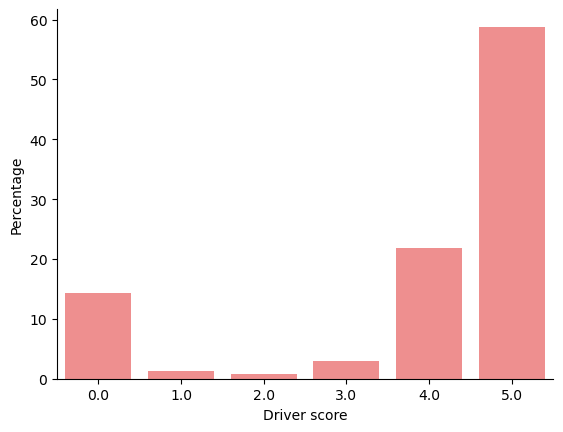

In [110]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='red', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [111]:
rider_score_counts = taxi_peru \
    .rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'rider_score', 
                     'rider_score': 'percentage'}) \
    .sort_values('rider_score')

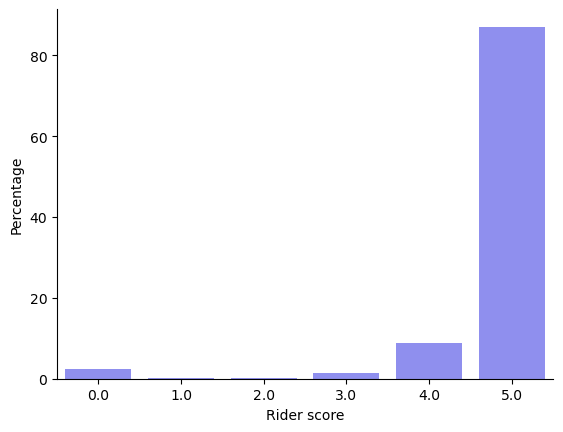

In [114]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()